In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  # Better than CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import re
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

# Load data
data = pd.read_csv("language.csv")

In [2]:

# See all unique values in a specific column, e.g., 'column_name'
unique_values = data['language'].unique()

# Print the unique values
print(unique_values)


['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic']


In [3]:
data.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [4]:
# Custom preprocessor
def preprocess_text(text):
    # Remove special chars/numbers
    text = re.sub(r'[^a-zA-Z\u0400-\u04FF\u4e00-\u9FFF]', ' ', str(text))
    # Lowercase
    text = text.lower()
    # Tokenize and stem
    stemmer = SnowballStemmer("english")  # Base stemmer
    tokens = word_tokenize(text)
    return ' '.join([stemmer.stem(token) for token in tokens])

# Apply preprocessing
data['processed_text'] = data['Text'].apply(preprocess_text)

In [5]:
# TF-IDF with better parameters
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Consider word pairs
    max_features=10000,   # Limit feature size
    stop_words='english'  # Remove common words
)

X = vectorizer.fit_transform(data['processed_text'])
y = data['language']

In [6]:
# Create pipeline
model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB(alpha=0.01)  # Tuned smoothing parameter
)

X_train, X_test, y_train, y_test = train_test_split(
    data['Text'], y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.01))])

              precision    recall  f1-score   support

      Arabic       0.64      1.00      0.78       200
     Chinese       0.96      0.56      0.70       200
       Dutch       1.00      0.98      0.99       200
     English       0.74      1.00      0.85       200
    Estonian       0.99      0.98      0.99       200
      French       0.96      0.99      0.98       200
       Hindi       0.99      0.96      0.98       200
  Indonesian       0.99      0.97      0.98       200
    Japanese       0.98      0.65      0.78       200
      Korean       1.00      0.98      0.99       200
       Latin       1.00      0.94      0.97       200
     Persian       0.99      0.99      0.99       200
   Portugese       0.98      0.98      0.98       200
      Pushto       1.00      0.96      0.98       200
    Romanian       0.99      0.98      0.99       200
     Russian       0.99      0.99      0.99       200
     Spanish       0.98      0.98      0.98       200
     Swedish       0.99    

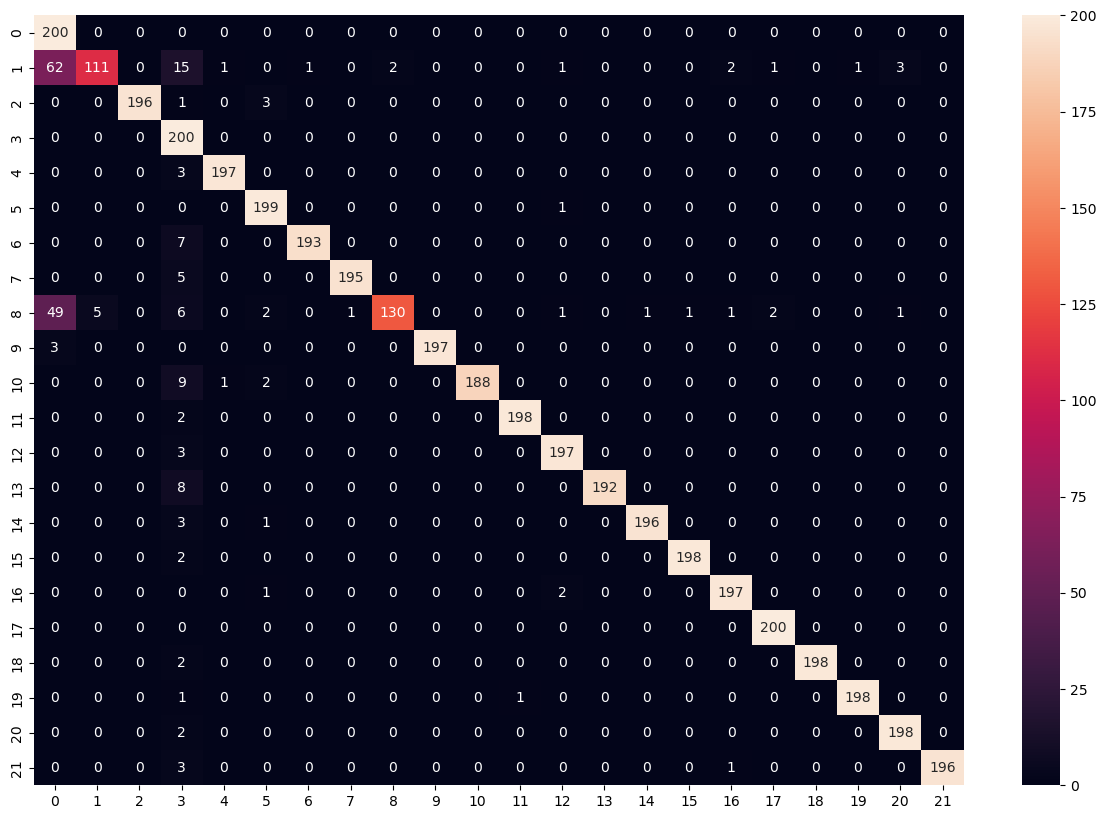

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Detailed metrics
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
def predict_with_confidence(text):
    probas = model.predict_proba([text])[0]
    top3_idx = probas.argsort()[-3:][::-1]
    return {
        "prediction": model.classes_[top3_idx[0]],
        "confidence": probas[top3_idx[0]],
        "alternatives": [
            (model.classes_[i], float(probas[i])) 
            for i in top3_idx[1:]
        ]
    }

# Example usage
user_input = input("Enter a Text: ")
result = predict_with_confidence(user_input)
print(f"Predicted: {result['prediction']} ")
print("Alternatives:", result['alternatives'])

In [ ]:
import joblib
from sklearn.pipeline import make_pipeline  # if you're using scikit-learn

# Assuming you have a trained model called 'model'
# Save the model to a file
model_filename = 'Detection_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# If you're using a pipeline that includes vectorizer and classifier
# pipeline = make_pipeline(vectorizer, classifier)
# joblib.dump(pipeline, model_filename)

In [ ]:
# Test loading the model
loaded_model = joblib.load('Detection_model.joblib')
test_text = "This is a test sentence"
print(loaded_model.predict([test_text]))

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('your_file.csv')  # replace with your actual file path

# See all unique values in a specific column, e.g., 'column_name'
unique_values = df['column_name'].unique()

# Print the unique values
print(unique_values)
